In [1]:
!wget https://raw.githubusercontent.com/fmardero/FuturoLavoro/master/sales_data/db2.0.csv

--2019-12-13 17:00:05--  https://raw.githubusercontent.com/fmardero/FuturoLavoro/master/sales_data/db2.0.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64734 (63K) [text/plain]
Saving to: ‘db2.0.csv.5’

db2.0.csv.5         100%[===================>]  63.22K  --.-KB/s    in 0.02s   

2019-12-13 17:00:06 (2.53 MB/s) - ‘db2.0.csv.5’ saved [64734/64734]



In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('db2.0.csv')
df.rename(columns={'data': 'date', 'somma_polli': 'sales', 'feste': 'holidays', 'fenomeni': 'weather'}, inplace=True)
df.date = pd.to_datetime(df.date)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
date                   1520 non-null datetime64[ns]
dayname                1520 non-null object
sales                  1520 non-null int64
t_media                1520 non-null int64
t_min                  1520 non-null int64
umidità_percentuale    1520 non-null int64
weather                1520 non-null object
juventus               1520 non-null object
holidays               83 non-null object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 107.0+ KB


In [5]:
df.head()

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays
0,2015-01-01,giovedì,6,0,-5,81,sole,0,Primo dell'Anno
1,2015-01-02,venerdì,9,0,-4,85,sole,0,NaN
2,2015-01-03,sabato,14,4,-1,78,sole,0,NaN
3,2015-01-04,domenica,10,3,-3,68,sole,0,NaN
4,2015-01-05,lunedì,14,4,-3,56,sole,0,NaN


## Cleaning Days

In [6]:
df.dayname.value_counts()

sabato       255
venerdì      253
giovedì      252
mercoledì    250
martedì      250
domenica     249
lunedì        11
Name: dayname, dtype: int64

Delate Mondays

In [0]:
df.drop(index=df.query("dayname == 'lunedì'").index, inplace=True)

In [8]:
df.dayname.value_counts()

sabato       255
venerdì      253
giovedì      252
mercoledì    250
martedì      250
domenica     249
Name: dayname, dtype: int64

## AutoCorrelogram

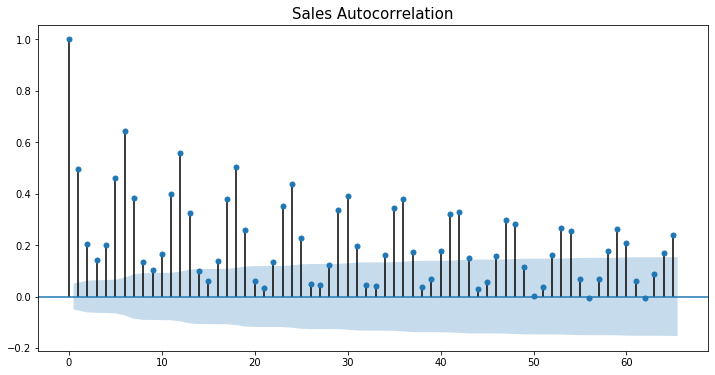

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df.sales.values, lags=65, ax=ax)
plt.title('Sales Autocorrelation', fontsize=15)
plt.show()

## Sales PDF

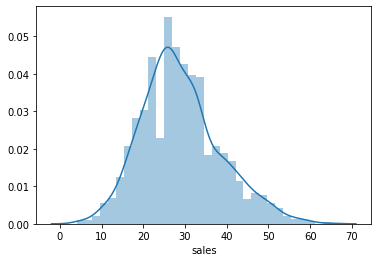

In [10]:
sns.distplot(df.sales, rug=False)

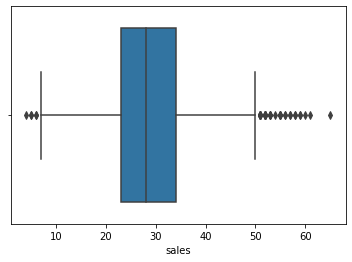

In [11]:
sns.boxplot(df.sales)

In [12]:
df.query('sales < 10')

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays
0,2015-01-01,giovedì,6,0,-5,81,sole,0,Primo dell'Anno
1,2015-01-02,venerdì,9,0,-4,85,sole,0,NaN
6,2015-01-07,mercoledì,4,3,-1,83,sole,serie A,NaN
10,2015-01-11,domenica,6,1,-2,91,nebbia,0,NaN
13,2015-01-15,giovedì,8,4,0,88,pioggia nebbia,0,NaN
19,2015-01-22,giovedì,7,6,5,87,pioggia,0,NaN
82,2015-04-05,domenica,5,9,6,62,pioggia,serie A,Pasqua
83,2015-04-07,martedì,8,10,2,37,sole,0,NaN
439,2016-05-31,martedì,9,19,15,73,sole,0,NaN
616,2016-12-22,giovedì,9,4,-1,84,sole,0,NaN


### Fist 100 days after opening

In [13]:
df.loc[:21]

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays
0,2015-01-01,giovedì,6,0,-5,81,sole,0,Primo dell'Anno
1,2015-01-02,venerdì,9,0,-4,85,sole,0,NaN
2,2015-01-03,sabato,14,4,-1,78,sole,0,NaN
3,2015-01-04,domenica,10,3,-3,68,sole,0,NaN
5,2015-01-06,martedì,13,2,-3,80,sole,0,Epifania
6,2015-01-07,mercoledì,4,3,-1,83,sole,serie A,NaN
7,2015-01-08,giovedì,10,4,1,84,sole,0,NaN
8,2015-01-09,venerdì,13,2,-1,91,nebbia,0,NaN
9,2015-01-10,sabato,14,2,-1,90,nebbia,0,NaN
10,2015-01-11,domenica,6,1,-2,91,nebbia,0,NaN


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


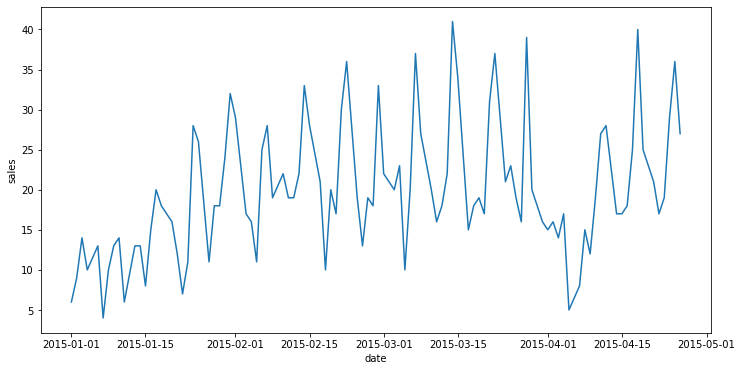

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.loc[:100], x='date', y='sales')
plt.show()

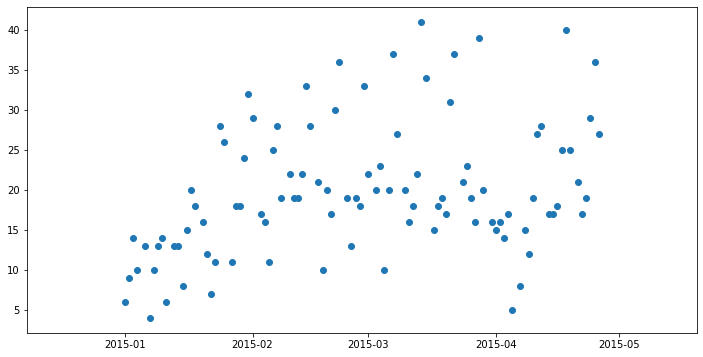

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df.loc[:100, 'date'], y=df.loc[:100, 'sales'])
plt.show()

* Fist 20 days after opening: OK (not anomalies)
* Days: 2015-04-05/06 (index=82,83) anomalies doe to Easter?

In [16]:
df.loc[80:85]

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays
80,2015-04-03,venerdì,14,11,7,47,sole,0,NaN
81,2015-04-04,sabato,17,10,8,53,sole,0,NaN
82,2015-04-05,domenica,5,9,6,62,pioggia,serie A,Pasqua
83,2015-04-07,martedì,8,10,2,37,sole,0,NaN
84,2015-04-08,mercoledì,15,11,2,46,sole,0,NaN
85,2015-04-09,giovedì,12,13,6,53,sole,0,NaN


In [17]:
df.query("holidays == 'Pasqua'")

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays
82,2015-04-05,domenica,5,9,6,62,pioggia,serie A,Pasqua


**Easter is a disaster for sales**

In [18]:
df.loc[439].name

439

In [19]:
for date in df.loc[[439, 616, 632, 852], 'date']:
    print(date)

2016-05-31 00:00:00
2016-12-22 00:00:00
2017-01-10 00:00:00
2017-09-23 00:00:00


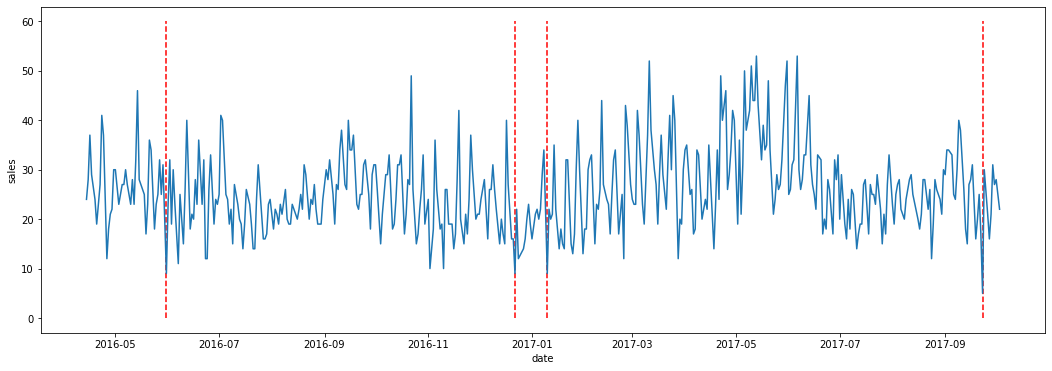

In [20]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df.loc[400:860], x='date', y='sales')
for date in df.loc[[439, 616, 632, 852], 'date']:
    plt.vlines(x=date, ymin=0, ymax=60, color='r', lw=1.5, ls='--')
plt.show()

### Bollinger Bands

In [0]:
ma_list = []
std_list = []
window = [1, 5, 6, 7]

for idx in range(len(df)):
    if idx > 6:
        ma_val = np.mean([df.iloc[idx-k].sales for k in window])
        std_val = np.std([df.iloc[idx-k].sales for k in window])
    else:
        ma_val = np.nan
        std_val = np.nan
    ma_list.append(ma_val)
    std_list.append(std_val)

df['ma_4'] = ma_list
df['ma_std'] = std_list

In [0]:
df['ma-3std'] = df.ma_4 - 2*df.ma_std
df['ma+3std'] = df.ma_4 + 2*df.ma_std

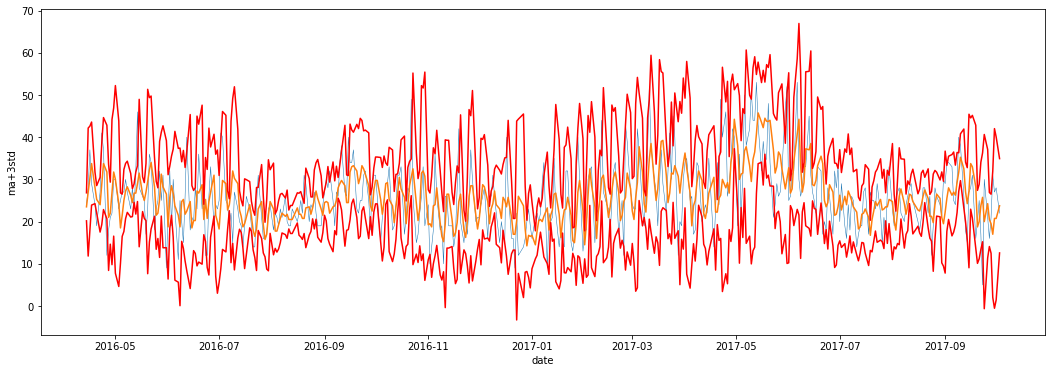

In [23]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df.loc[400:860], x='date', y='sales', lw=0.5, ls='--')
sns.lineplot(data=df.loc[400:860], x='date', y='ma_4')
sns.lineplot(data=df.loc[400:860], x='date', y='ma-3std', color='red')
sns.lineplot(data=df.loc[400:860], x='date', y='ma+3std', color='red')
plt.show()

In [24]:
df.tail()

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays,ma_4,ma_std,ma-3std,ma+3std
1515,2019-11-13,mercoledì,32,10,7,65,sole,0,NaN,36.50,8.077747,20.344506,52.655494
1516,2019-11-14,giovedì,35,8,2,67,sole,0,NaN,39.25,8.466847,22.316306,56.183694
1517,2019-11-15,venerdì,54,10,6,87,sole,0,NaN,43.75,11.924240,19.901520,67.598480
1518,2019-11-16,sabato,52,8,5,92,sole,0,NaN,53.75,3.897114,45.955771,61.544229
1519,2019-11-17,domenica,43,9,5,89,sole,0,NaN,47.50,12.338963,22.822075,72.177925


## Percentage Variations

In [0]:
df['sales_change'] = df.sales.pct_change(periods=1)

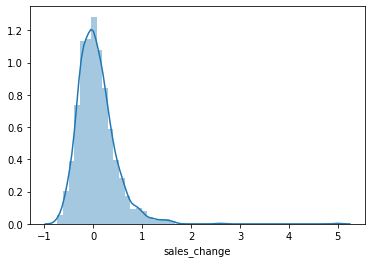

In [26]:
sns.distplot(df.sales_change.dropna(), rug=False)

In [27]:
df.query('sales_change > 1.5')

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays,ma_4,ma_std,ma-3std,ma+3std,sales_change
21,2015-01-24,sabato,28,5,2,75,sole,0,NaN,16.00,3.391165,9.217670,22.782330,1.545455
385,2016-03-26,sabato,26,11,4,65,sole,0,NaN,25.25,9.705024,5.839951,44.660049,1.600000
440,2016-06-01,mercoledì,23,18,13,78,pioggia,0,NaN,18.75,6.179604,6.390793,31.109207,1.555556
581,2016-11-11,venerdì,26,6,2,87,sole,0,NaN,19.50,9.937303,-0.374607,39.374607,1.600000
612,2016-12-17,sabato,40,0,-4,92,sole,0,NaN,23.50,5.852350,11.795300,35.204700,1.666667
672,2017-02-25,sabato,43,8,2,59,sole,0,NaN,25.75,8.613217,8.523567,42.976433,2.583333
853,2017-09-24,domenica,30,16,13,81,pioggia temporale,serie A,NaN,20.00,10.319884,-0.639767,40.639767,5.000000


In [28]:
df.loc[[671, 672, 852, 853]]

,date,dayname,sales,t_media,t_min,umidità_percentuale,weather,juventus,holidays,ma_4,ma_std,ma-3std,ma+3std,sales_change
671,2017-02-24,venerdì,12,8,7,91,nebbia,0,NaN,24.75,5.309190,14.131620,35.368380,-0.520000
672,2017-02-25,sabato,43,8,2,59,sole,0,NaN,25.75,8.613217,8.523567,42.976433,2.583333
852,2017-09-23,sabato,5,17,12,73,sole,0,NaN,25.75,5.261891,15.226217,36.273783,-0.705882
853,2017-09-24,domenica,30,16,13,81,pioggia temporale,serie A,NaN,20.00,10.319884,-0.639767,40.639767,5.000000


# Dataset

In [0]:
dataset = df[['sales', 't_media', 't_min', 'umidità_percentuale', 'juventus', 'sales_change']].copy()

## Day - Month

In [0]:
#dataset['day_sin']
#dataset['day_cos']
#...

## Teams

In [0]:
dataset.juventus = dataset.juventus.apply(lambda x: 0 if x == '0' else 1)

## Holidays

In [32]:
df.holidays.unique()

array(["Primo dell'Anno", nan, 'Epifania', 'Giovedì Grasso',
       'San Valentino', 'Carnevale', 'Martedì Grasso',
       'Festa di San Giuseppe', 'Domenica delle Palme', 'Pasqua',
       'Anniversario della Liberazione', 'Festa dei Lavoratori',
       'Festa della Mamma', 'Pentecoste', 'Festa della Repubblica',
       'Ferragosto', 'Ognissanti', 'Immacolata Concezione',
       'Santo Stefano', "Ultimo dell'Anno", 'Giorno dei Morti'],
      dtype=object)

In [0]:
dataset = pd.concat([dataset, pd.get_dummies(df.holidays, dummy_na=False)], axis=1)

## Weather

In [34]:
df.weather.unique()

array(['sole', 'nebbia ', 'pioggia nebbia ', 'pioggia ',
       'pioggia temporale nebbia ', 'pioggia temporale ', 'temporale ',
       'pioggia neve nebbia ', 'neve ', 'pioggia neve '], dtype=object)

In [0]:
dataset = pd.concat([dataset, pd.get_dummies(df.weather, drop_first=True, dummy_na=False)], axis=1)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 1519
Data columns (total 35 columns):
sales                             1509 non-null int64
t_media                           1509 non-null int64
t_min                             1509 non-null int64
umidità_percentuale               1509 non-null int64
juventus                          1509 non-null int64
sales_change                      1508 non-null float64
Anniversario della Liberazione    1509 non-null uint8
Carnevale                         1509 non-null uint8
Domenica delle Palme              1509 non-null uint8
Epifania                          1509 non-null uint8
Ferragosto                        1509 non-null uint8
Festa dei Lavoratori              1509 non-null uint8
Festa della Mamma                 1509 non-null uint8
Festa della Repubblica            1509 non-null uint8
Festa di San Giuseppe             1509 non-null uint8
Giorno dei Morti                  1509 non-null uint8
Giovedì Grasso             

## Lag

In [0]:
lag_window = [1, 5, 6, 7, 11, 12, 13]

In [0]:
for lag in lag_window:
    dataset[f'sales_lag{lag}'] = dataset.sales.shift(lag)

In [0]:
dataset = dataset.iloc[max(lag_window):]

## Check Dataset has no empty columns

In [40]:
dataset.isnull().any(axis=0)

sales                             False
t_media                           False
t_min                             False
umidità_percentuale               False
juventus                          False
sales_change                      False
Anniversario della Liberazione    False
Carnevale                         False
Domenica delle Palme              False
Epifania                          False
Ferragosto                        False
Festa dei Lavoratori              False
Festa della Mamma                 False
Festa della Repubblica            False
Festa di San Giuseppe             False
Giorno dei Morti                  False
Giovedì Grasso                    False
Immacolata Concezione             False
Martedì Grasso                    False
Ognissanti                        False
Pasqua                            False
Pentecoste                        False
Primo dell'Anno                   False
San Valentino                     False
Santo Stefano                     False


## Basic Model - Linear Regression

In [0]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, RandomizedSearchCV

In [0]:
TEST_SIZE = 0.15

In [0]:
X = dataset.drop(columns=['sales', 'sales_change'])
y = dataset.sales

split_idx = dataset.iloc[int(len(dataset)*(1-TEST_SIZE))].name

X_train, X_test = X.loc[:split_idx], X.loc[split_idx:]
y_train, y_test = y.loc[:split_idx], y.loc[split_idx:]

In [0]:
model = Ridge()

In [0]:
hyperparameters = {'alpha': np.linspace(start=0., stop=5., num=20)}

random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=hyperparameters,
                                   n_iter=20,
                                   cv=TimeSeriesSplit(n_splits=10),
                                   n_jobs=-1)

In [46]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
                   error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [47]:
random_search.cv_results_['mean_test_score']

array([-1.05086940e+27,  3.39470889e-01,  3.44208054e-01,  3.46795333e-01,
        3.48318164e-01,  3.49258531e-01,  3.49857092e-01,  3.50244544e-01,
        3.50496488e-01,  3.50658861e-01,  3.50760682e-01,  3.50820877e-01,
        3.50852113e-01,  3.50863051e-01,  3.50859721e-01,  3.50846384e-01,
        3.50826086e-01,  3.50801026e-01,  3.50772806e-01,  3.50742597e-01])

In [48]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=model, 
                X=X_train, 
                y=y_train, 
                cv=TimeSeriesSplit(n_splits=10),
                n_jobs=-1)

array([0.30948173, 0.48037683, 0.11049235, 0.43513778, 0.3431074 ,
       0.3550027 , 0.23656895, 0.36624156, 0.35491472, 0.48938476])

In [0]:
best_model = random_search.best_estimator_

In [0]:
pred = np.round(best_model.predict(X_test))

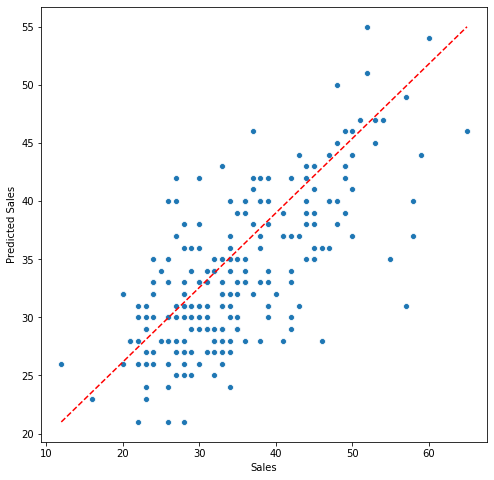

In [51]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(pred), max(pred)], lw=1.5, color='red', ls='--')
plt.xlabel('Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [52]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=pred)

0.4769615384615383